In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Your data
# full auto-line (original ROI within +4/-10 degrees by FIJI measure result)
#data = [108.115, 289.281, -181.707, 75.905, 506.325, 547.137, 778.628, 969.955, 889.725, 875.639, 1873.760, 2215.669, 3565.612, 3964.793, 5938.313, 6630.366, 7865.556, 8848.469, 9464.982, 9804.353, 8863.031, 10664.344, 10490.691, 11049.531, 11630.703, 12054.180, 13719.323, 14497.034, 15293.118, 13842.582, 16665.266, 17557.781, 15149.214, 14450.711, 14123.245, 15745.962, 14270.242, 12782.901, 12246.396, 11158.347, 11078.082, 12838.878, 13429.422, 14960.248, 15771.085, 14894.541, 12757.881, 12890.071, 12679.599, 13288.829, 12928.600, 11640.081, 10278.551, 10643.645, 10578.558, 11435.466, 12344.738, 13732.441, 14313.479, 13035.103, 12796.271, 11426.260, 10560.497, 9569.096, 10599.014, 10746.242, 9954.724, 9789.494, 10577.036, 11561.804, 11797.548, 13420.236, 13137.127, 13270.975, 12629.588, 10451.785, 7103.086, 6700.946, 7755.830, 7364.819, 7638.393, 10275.776, 11398.414, 12263.784, 14810.912, 15919.879, 16741.189, 15222.531, 15877.760, 14938.979, 13970.610, 13186.675, 11947.562, 11308.008, 8480.865, 8306.041, 6601.939, 5271.835, 6308.119, 5871.568, 6358.373, 6988.841, 8072.001, 8485.989, 8544.240, 9233.355, 7999.396, 7860.006, 7364.092, 6346.099, 5891.931, 4318.449, 5213.200, 3455.857, 3850.658, 3841.902, 3262.518, 3977.084, 4423.394, 3113.951, 3117.959, 3584.352, 3082.727, 2651.054, 2608.126, 2905.469, 2311.604, 2196.206, 2012.876, 2331.550, 2905.419, 2838.908, 1877.834, 1395.608, 1848.673, 2700.274, 2257.963, 1735.727, 1405.874, 986.718, 1739.427, 1794.915]
# shortened auto-line ROI (~90% drawing)
# data = [
#     9954.760, 12741.963, 15069.186, 15758.768, 17762.590, 22107.098,
#     17441.062, 11068.547, 8540.510, 12538.967, 17075.646, 18284.193,
#     13853.648, 9077.748, 8428.373, 9227.364, 11433.121, 14247.498,
#     18138.203, 19857.363, 14818.711, 11542.914, 9320.501, 11481.359,
#     14113.952, 15725.499, 12934.801, 9044.811, 8055.455, 8065.163,
#     10735.719, 12778.431, 14841.369, 15793.725, 15026.986, 13061.039,
#     10078.380, 10193.796, 10569.225, 12106.071, 11189.848, 9040.406,
#     7943.530, 9383.679, 9176.271, 11204.116, 13913.177, 15775.229,
#     17638.551, 15894.643, 9388.405, 7102.954, 6197.279, 5754.996,
#     5588.777, 6697.538, 8556.129, 9211.485, 12849.254, 16212.191,
#     16515.148, 16679.029, 16441.748, 15439.915, 15950.543, 17042.174,
#     16461.500, 14388.197, 14278.355, 11385.543, 8551.064, 5331.167,
#     4804.134, 5075.454, 4042.533, 5018.368, 5969.832, 6715.244,
#     7806.381, 9665.615, 10067.207, 8911.562, 10650.878, 8411.281
# ]

# 'noisy area' <(-10) >4 degrees?, same image, closer to -80, -100 (ie more horizon)
# data = [
#     9801.694, 10292.944, 11442.194, 10617.067, 9874.632, 11069.645,
#     12270.848, 13270.488, 14502.667, 14313.178, 13385.840, 12579.630,
#     15190.014, 13601.348, 12662.750, 13554.783, 12117.944, 12924.584,
#     13241.396, 13998.379, 14178.527, 13093.062, 12166.431, 14101.075,
#     12738.277, 16047.309, 12406.896, 13288.880, 13294.007, 12212.013,
#     13791.973, 11162.680, 12251.750, 11592.867, 10558.083, 15616.259,
#     15148.236, 11592.431, 11183.069, 11393.867, 10867.819, 10539.891,
#     11745.882, 11055.699, 10399.410, 9687.980, 8530.007, 7085.517,
#     8611.500, 8528.554, 9261.174, 8617.068, 7246.688, 7744.487,
#     8993.576, 8177.779, 6984.625, 6681.269, 5686.701, 6226.493,
#     8288.896, 8211.933, 7882.465, 8374.552, 5868.472
# ]

#spline ROI example - from surface - clear
data = [
    4586.000, 5966.231, 5013.511, 4206.301, 4679.852, 7359.937,
    8619.336, 9115.250, 9994.894, 11188.484, 10168.587, 7941.576,
    6831.650, 7091.592, 9422.363, 9848.967, 8302.208, 8980.073,
    9567.419, 9019.272, 7819.680, 7571.035, 8003.451, 6797.288,
    7480.978, 8287.320, 8857.785, 8911.758, 6707.929, 5658.692,
    7176.242, 8178.924, 5682.501, 4267.257, 6380.252, 8307.429,
    6312.267, 4170.390, 5580.598, 6830.132, 8966.664, 9773.413,
    6490.816, 3355.739, 4416.878, 5014.299, 4404.462, 4514.837,
    5133.865, 4971.979, 4774.576, 2132.739, 4919.922, 3148.504,
    3095.382, 4382.476, 4517.020, 2313.582, 5710.729, 7304.924,
    4867.173, 3238.711, 5808.707, 9064.362, 11045.459, 11070.865,
    10541.265, 6179.142, 2020.096, 4827.622, 11325.880, 9940.649,
    4834.174, 2187.064, 2681.538, 6359.033, 6290.502, 6139.753,
    5033.207, 4557.359, 3853.490, 9172.077, 10675.233, 9100.170,
    10335.378, 10874.334, 8031.160, 7611.753, 4764.759, 2762.267,
    3218.741, 5698.999, 7157.117, 6588.182, 2934.851, 2626.830,
    4911.104, 6672.117, 6848.074, 8820.289, 7690.746, 7868.163,
    7430.533, 6991.360, 5254.705, 3241.083, 3373.834, 5673.567,
    8298.752, 9066.519, 7067.680, 4686.238, 3192.208, 5063.069,
    7160.575, 4107.815, 3057.738, 2452.009, 3090.793, 3361.190,
    4841.521, 5260.631, 6165.720, 6158.646, 6386.887, 5881.819,
    4709.378, 3309.308, 2893.870, 1562.407, 4065.697, 6618.304,
    6390.989, 6505.656, 3519.509, 1336.716, 1213.091, 1992.799,
    3933.391
]

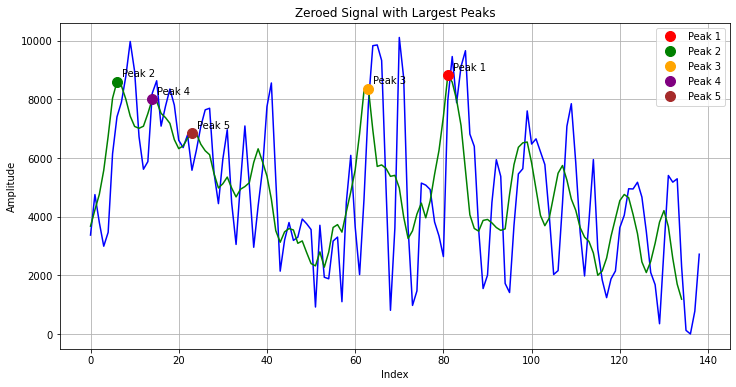

Top 5 peaks:
Peak 1: Index = 81, Height = 8818.35
Peak 2: Index = 6, Height = 8604.22
Peak 3: Index = 63, Height = 8367.13
Peak 4: Index = 14, Height = 8011.12
Peak 5: Index = 23, Height = 6853.93


In [69]:
# Zero the signal by subtracting the minimum value
zeroed_data = np.array(data) - min(data)

# Smoothing the signal with a moving average
smoothed_intensity = np.convolve(zeroed_data, np.ones(5)/5, mode='valid')  # Simple moving average

# Find peaks
#peaks, _ = find_peaks(zeroed_data, height=np.mean(zeroed_data), distance=5)
peaks, _ = find_peaks(smoothed_intensity, height=np.mean(smoothed_intensity), distance=5)


# Sort peaks by height and get the top 5
top_peaks = sorted([(i, smoothed_intensity[i]) for i in peaks], key=lambda x: x[1], reverse=True)[:5]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(zeroed_data, color='blue')
plt.plot(smoothed_intensity, color='green')
plt.title('Zeroed Signal with Largest Peaks')
plt.xlabel('Index')
plt.ylabel('Amplitude')

# Add colored dots for the top 5 peaks
colors = ['red', 'green', 'orange', 'purple', 'brown']
for i, (index, height) in enumerate(top_peaks):
    plt.plot(index, height, 'o', color=colors[i], markersize=10, label=f'Peak {i+1}')
    plt.annotate(f'Peak {i+1}', (index, height), xytext=(5, 5), textcoords='offset points')

plt.legend()
plt.grid(True)
plt.show()

# Print peak information
print("Top 5 peaks:")
for i, (index, height) in enumerate(top_peaks):
    print(f"Peak {i+1}: Index = {index}, Height = {height:.2f}")

In [70]:
import numpy as np
import scipy.signal as signal

#intensity = zeroed_data
smoothed_intensity = np.convolve(zeroed_data, np.ones(5)/5, mode='valid')  # Simple moving average
intensity=smoothed_intensity
# Exclude the last 10% from each edge
start_index = 1 #int(0.1 * len(intensity))
end_index = int(len(intensity)) #int(0.9 * len(intensity))
intensity_central = intensity[start_index:end_index]

# Detect troughs (inverted peaks) representing RBCs
troughs, _ = signal.find_peaks(-intensity_central)  # Detect minima (RBCs)
#troughs, _ = find_peaks(intensity_central, height=np.mean(intensity_central))

# Calculate time intervals between troughs
trough_intervals = np.diff(troughs)

# Estimate hematocrit as the proportion of time occupied by RBCs to the total time
rbc_occupied_time = np.sum(trough_intervals)
total_time_central = len(intensity_central)

hematocrit_estimate_corrected = rbc_occupied_time / total_time_central
hematocrit_estimate_corrected, troughs




(0.8582089552238806,
 array([ 10,  19,  28,  32,  42,  46,  50,  52,  56,  64,  67,  71,  75,
         87,  92, 102, 114, 125]))

Text(0, 0.5, 'Amplitude')

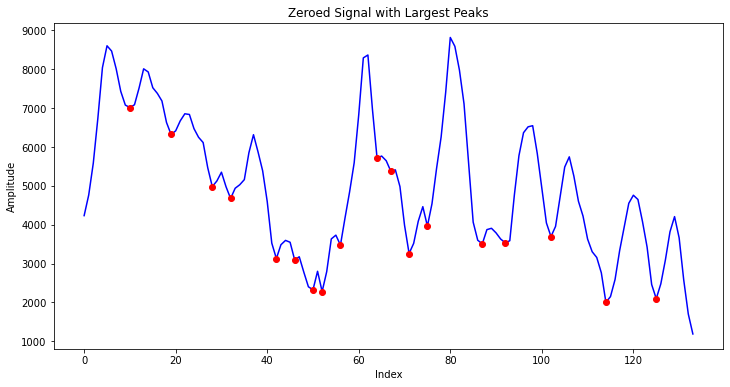

In [71]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(intensity_central, color='blue')
#plt.plot(intensity_central, color='green')
plt.plot(troughs,intensity_central[troughs], 'ro')
plt.title('Zeroed Signal with Largest Peaks')
plt.xlabel('Index')
plt.ylabel('Amplitude')

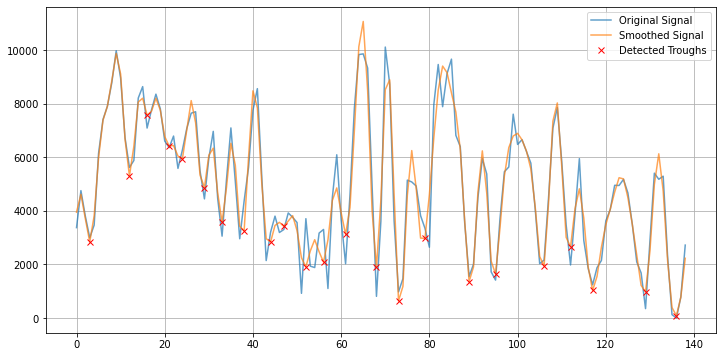

Estimated Hematocrit: 95.68%


In [72]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Replace with your actual intensity data
#intensity = intensity
#intensity = np.array([...])  

# Exclude the first and last 10% - SKIP
# start_index = 1#int(0.1 * len(intensity))
# end_index = int(len(intensity)) #int(0.9 * len(intensity))
# intensity_central = intensity[start_index:end_index]
intensity_central = zeroed_data

# FFT to smooth the signal
fft_signal = np.fft.fft(intensity_central)
frequencies = np.fft.fftfreq(len(intensity_central))

# Filter: Zero out high frequencies (keep only low frequencies)
cutoff = 0.25  # Adjust this value based on your data
fft_signal[np.abs(frequencies) > cutoff] = 0

# Inverse FFT to get the smoothed signal
smoothed_signal = np.fft.ifft(fft_signal)

# Detect troughs in the smoothed signal
troughs, _ = signal.find_peaks(-smoothed_signal.real)  # Detect minima (RBCs)

# Calculate time intervals between troughs
trough_intervals = np.diff(troughs)

# Estimate hematocrit as the proportion of time occupied by RBCs
rbc_occupied_time = np.sum(trough_intervals)
total_time_central = len(smoothed_signal)

hematocrit_estimate = rbc_occupied_time / total_time_central

# Plot the original and smoothed signal with detected troughs
plt.figure(figsize=(12, 6))
plt.plot(intensity_central, label='Original Signal', alpha=0.7)
plt.plot(smoothed_signal.real, label='Smoothed Signal', alpha=0.7)
plt.plot(troughs, smoothed_signal.real[troughs], 'rx', label='Detected Troughs')
plt.grid(True)
plt.legend()
plt.show()

print(f"Estimated Hematocrit: {hematocrit_estimate:.2%}")
